In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline
print("✅ Все библиотеки загружены!")

✅ Все библиотеки загружены!


In [3]:
df = pd.read_csv('../data/superstore_dataset.csv')

In [4]:
print("📊 Размер датасета:", df.shape)
print("\n🔍 Первые 5 строк:")
df.head()

📊 Размер датасета: (9800, 18)

🔍 Первые 5 строк:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [5]:
print("📈 Информация о данных:")
print(df.info())
print("\n📊 Основные статистики:")
print(df.describe())

📈 Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null 

In [6]:
print("\n❌ Пропущенные значения:")
print(df.isnull().sum())


❌ Пропущенные значения:
Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


In [7]:
print("🔍 ТЕКУЩЕЕ СОСТОЯНИЕ 'Order Date':")
print("Первые 5 значений:", df['Order Date'].head().tolist())
print("Тип данных:", df['Order Date'].dtype)
print("Есть ли NaN:", df['Order Date'].isnull().sum())

🔍 ТЕКУЩЕЕ СОСТОЯНИЕ 'Order Date':
Первые 5 значений: ['08/11/2017', '08/11/2017', '12/06/2017', '11/10/2016', '11/10/2016']
Тип данных: object
Есть ли NaN: 0


In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

In [9]:
print("✅ После преобразования:")
print("Тип данных:", df['Order Date'].dtype)
print("Первые 5 дат:", df['Order Date'].head().tolist())
print("NaN после обработки:", df['Order Date'].isnull().sum())

✅ После преобразования:
Тип данных: datetime64[ns]
Первые 5 дат: [Timestamp('2017-08-11 00:00:00'), Timestamp('2017-08-11 00:00:00'), Timestamp('2017-12-06 00:00:00'), Timestamp('2016-11-10 00:00:00'), Timestamp('2016-11-10 00:00:00')]
NaN после обработки: 5841


In [10]:
if df['Order Date'].dtype == 'datetime64[ns]':
    df['Year'] = df['Order Date'].dt.year
    df['Month'] = df['Order Date'].dt.month_name()
    df['Quarter'] = df['Order Date'].dt.quarter
    df['Week'] = df['Order Date'].dt.isocalendar().week
    print("🎉 ✅ Данные подготовлены!")
    print(df[['Order Date', 'Year', 'Month', 'Quarter']].head())
else:
    print("❌ ОШИБКА: Order Date не datetime!")

🎉 ✅ Данные подготовлены!
  Order Date    Year     Month  Quarter
0 2017-08-11  2017.0    August      3.0
1 2017-08-11  2017.0    August      3.0
2 2017-12-06  2017.0  December      4.0
3 2016-11-10  2016.0  November      4.0
4 2016-11-10  2016.0  November      4.0


In [11]:
print("📋 ВСЕ КОЛОНКИ В ДАТАСЕТЕ:")
print(df.columns.tolist())
print("\n📊 Первые 3 строки:")
df.head(3)

📋 ВСЕ КОЛОНКИ В ДАТАСЕТЕ:
['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Year', 'Month', 'Quarter', 'Week']

📊 Первые 3 строки:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Year,Month,Quarter,Week
0,1,CA-2017-152156,2017-08-11,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017.0,August,3.0,32
1,2,CA-2017-152156,2017-08-11,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,2017.0,August,3.0,32
2,3,CA-2017-138688,2017-12-06,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2017.0,December,4.0,49


In [12]:
total_sales = df['Sales'].sum()
total_orders = df['Order ID'].nunique()  # Уникальные заказы
total_items = len(df)                    # Все товары
avg_order_value = df.groupby('Order ID')['Sales'].sum().mean()  # Настоящий AOV
avg_items_per_order = total_items / total_orders

print("📊 КЛЮЧЕВЫЕ МЕТРИКИ РОЗНИЧНОЙ СЕТИ:")
print(f"💰 Общая выручка (GMV): ${total_sales:,.0f}")
print(f"📦 Уникальных заказов: {total_orders:,}")
print(f"🛒 Всего товаров продано: {total_items:,}")
print(f"💵 Средний чек (AOV): ${avg_order_value:.0f}")
print(f"📦 Товаров в чеке: {avg_items_per_order:.1f}")
print(f"🌟 Средняя продажа товара: ${df['Sales'].mean():.0f}")

📊 КЛЮЧЕВЫЕ МЕТРИКИ РОЗНИЧНОЙ СЕТИ:
💰 Общая выручка (GMV): $2,261,537
📦 Уникальных заказов: 4,922
🛒 Всего товаров продано: 9,800
💵 Средний чек (AOV): $459
📦 Товаров в чеке: 2.0
🌟 Средняя продажа товара: $231


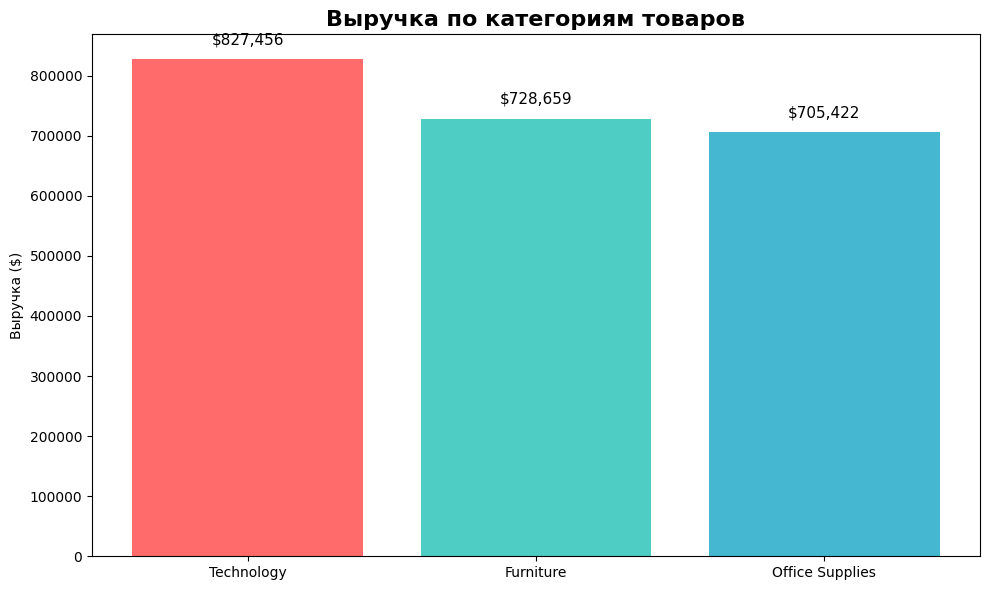

In [23]:
# График 1: Выручка по категориям
cat_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(cat_sales.index, cat_sales.values, 
               color=['#ff6b6b', '#4ecdc4', '#45b7d1'])
plt.title('Выручка по категориям товаров', fontsize=16, fontweight='bold')
plt.ylabel('Выручка ($)')
plt.xticks(rotation=0)

# Цифры НА барах
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 20000,
             f'${height:,.0f}', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

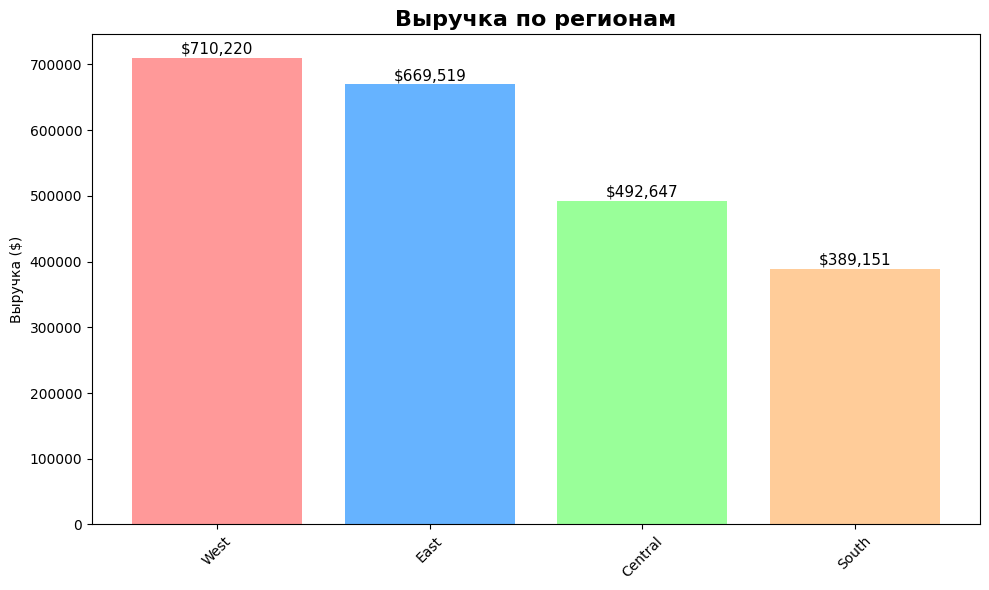

In [22]:
# Выручка по регионам
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
bars = plt.bar(region_sales.index, region_sales.values, color=colors)
plt.title('Выручка по регионам', fontsize=16, fontweight='bold')
plt.ylabel('Выручка ($)')
plt.xticks(rotation=45)

# Значения на барах
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 2000,
             f'${height:,.0f}', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

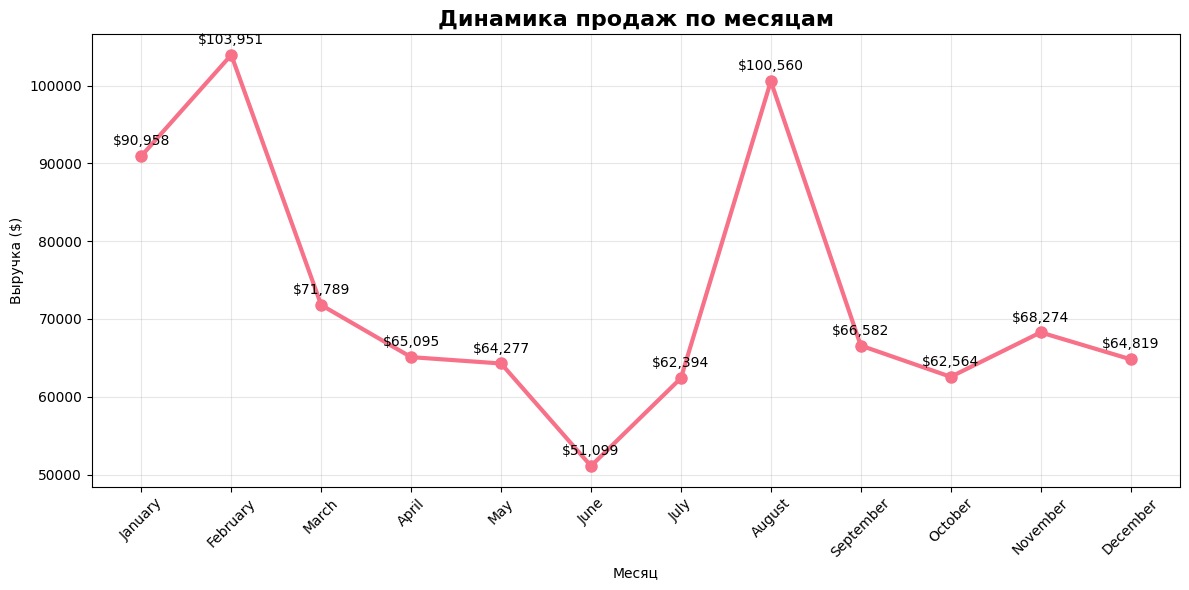

In [21]:
# Тренды по месяцам
monthly_sales = df.groupby('Month')['Sales'].sum().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June',
     'July', 'August', 'September', 'October', 'November', 'December']
)

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linewidth=3, markersize=8)
plt.title('Динамика продаж по месяцам', fontsize=16, fontweight='bold')
plt.ylabel('Выручка ($)')
plt.xlabel('Месяц')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Значения на точках
for i, v in enumerate(monthly_sales.values):
    plt.text(i, v + 1000, f'${v:,.0f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

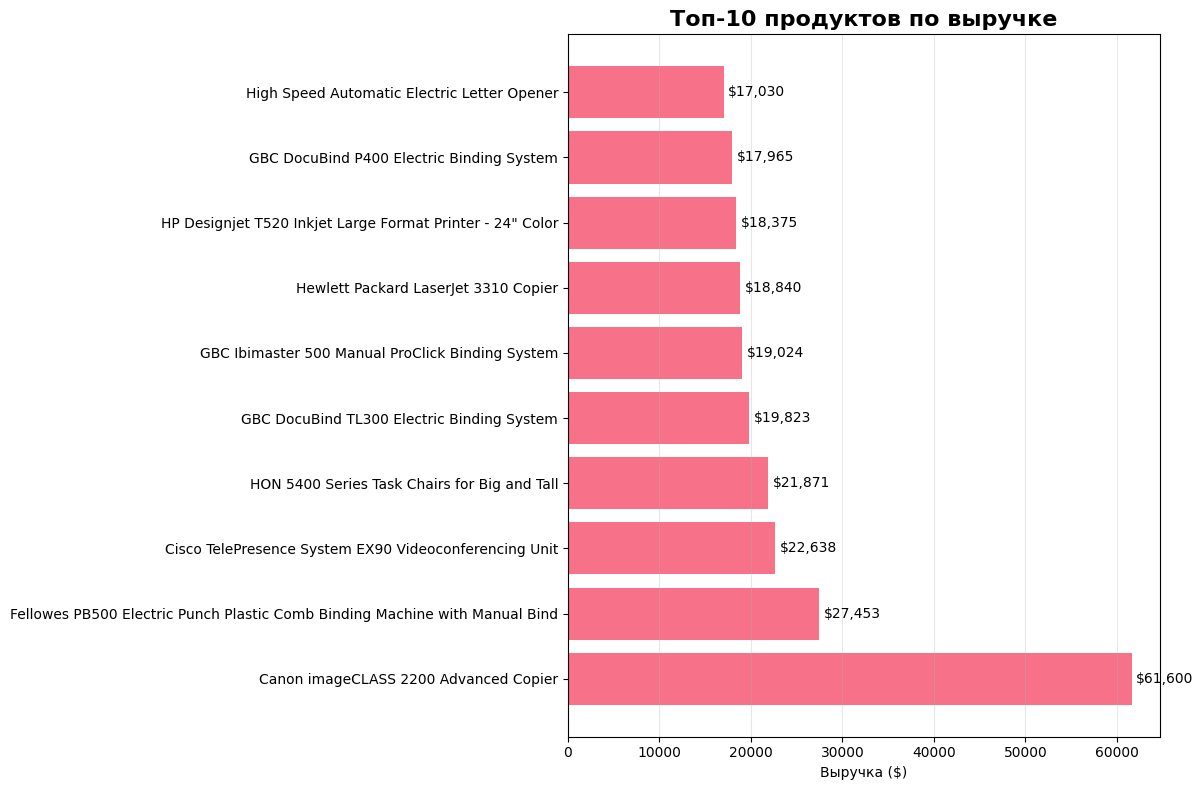

In [19]:
# Топ-10 продуктов по выручке
top_products = df.groupby('Product Name')['Sales'].sum().nlargest(10)

plt.figure(figsize=(12, 8))
bars = plt.barh(range(len(top_products)), top_products.values)
plt.title('Топ-10 продуктов по выручке', fontsize=16, fontweight='bold')
plt.xlabel('Выручка ($)')
plt.yticks(range(len(top_products)), top_products.index)
plt.grid(axis='x', alpha=0.3)

# Значения
for i, v in enumerate(top_products.values):
    plt.text(v + 500, i, f'${v:,.0f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [17]:
print("🎯 БИЗНЕС-РЕКОМЕНДАЦИИ:")

print("\n1️⃣ Сезонность спроса:")
print("- Основной пик продаж приходится на февраль — в этом месяце выручка максимальна.")
print("- Дополнительный высокий уровень продаж наблюдается в августе.")
print("- Минимум продаж — в июне, в начале лета спрос заметно проседает.")

print("\n2️⃣ Идеи для маркетинга и операций:")
print("- Усилить промо и наличие товара к февралю, заранее готовить акции и запасы.")
print("- Использовать октябрь как стартовый точечный пик: акции к праздникам, кросс-продажи.")
print("- В июне запускать стимулирующие акции (скидки, спецпредложения), чтобы сгладить сезонную просадку.")

🎯 БИЗНЕС-РЕКОМЕНДАЦИИ:

1️⃣ Сезонность спроса:
- Основной пик продаж приходится на февраль — в этом месяце выручка максимальна.
- Дополнительный высокий уровень продаж наблюдается в августе.
- Минимум продаж — в июне, в начале лета спрос заметно проседает.

2️⃣ Идеи для маркетинга и операций:
- Усилить промо и наличие товара к февралю, заранее готовить акции и запасы.
- Использовать октябрь как стартовый точечный пик: акции к праздникам, кросс-продажи.
- В июне запускать стимулирующие акции (скидки, спецпредложения), чтобы сгладить сезонную просадку.
